In [2]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
plt.rcParams['savefig.dpi'] = 1000

### Pmax = 0.1

In [20]:
df = pd.read_csv('lunedi', delim_whitespace = True)
df.head()
delta1 = df.loc[:, 'delta']
controls1 = df.iloc[:, 2:9]
controls1_abs = controls1.abs()
controls1_sum = controls1_abs.sum(axis=1)

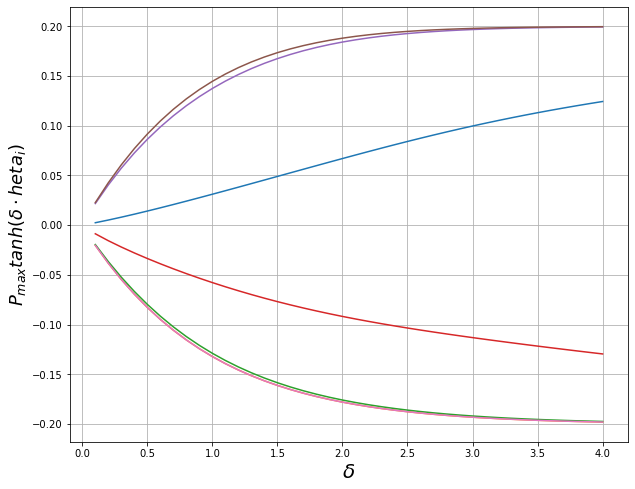

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(delta1, controls1)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0)
ax.set_ylabel('$P_{max} tanh( \delta \cdot \theta_{i} )$', fontsize=18, rotation=90)
plt.grid()
plt.show()

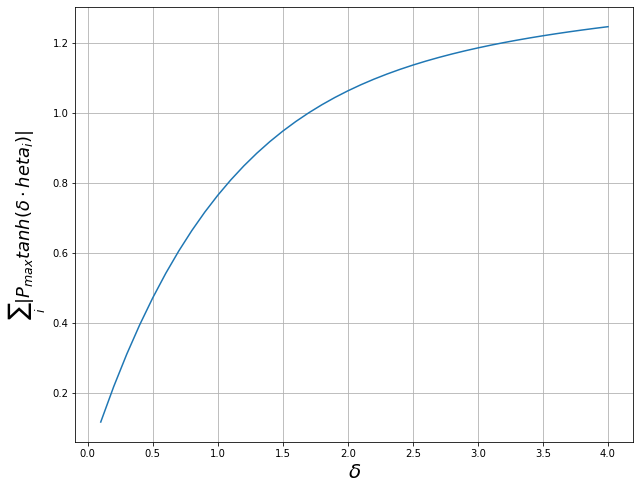

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(delta1, controls1_sum)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0)
ax.set_ylabel('$\sum_i | P_{max} tanh( \delta \cdot \theta_{i} )| $', fontsize=18, rotation=90)
plt.grid()
plt.show()

### Pmax = 0.2

In [7]:
df2 = pd.read_csv('control_varying_delta_Pmax_0.2_doubling_3-4_line', delim_whitespace = True, header = None)
df2.head()

,0,1,2,3,4,5,6,7,8
0,4.0,0.124401,-0.197982,-0.197391,-0.129498,0.199401,0.199650,-0.197982,0.199401
1,3.9,0.122299,-0.197713,-0.197073,-0.127964,0.199291,0.199581,-0.197713,0.199291
2,3.8,0.120122,-0.197409,-0.196717,-0.126409,0.199161,0.199499,-0.197409,0.199161
3,3.7,0.117867,-0.197066,-0.196320,-0.124832,0.199008,0.199400,-0.197066,0.199008
4,3.6,0.115533,-0.196680,-0.195876,-0.123232,0.198826,0.199283,-0.196680,0.198826


In [8]:
delta2 = df2.iloc[:,0]
controls2 = df2.iloc[:, 1:8]
controls2_abs = controls2.abs()
controls2_sum = controls2_abs.sum(axis=1)

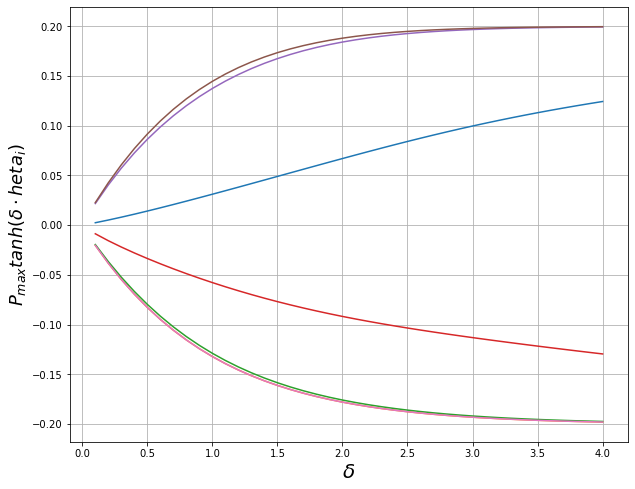

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(delta2, controls2)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0)
ax.set_ylabel('$P_{max} tanh( \delta \cdot \theta_{i} )$', fontsize=18, rotation=90)
plt.grid()
plt.show()

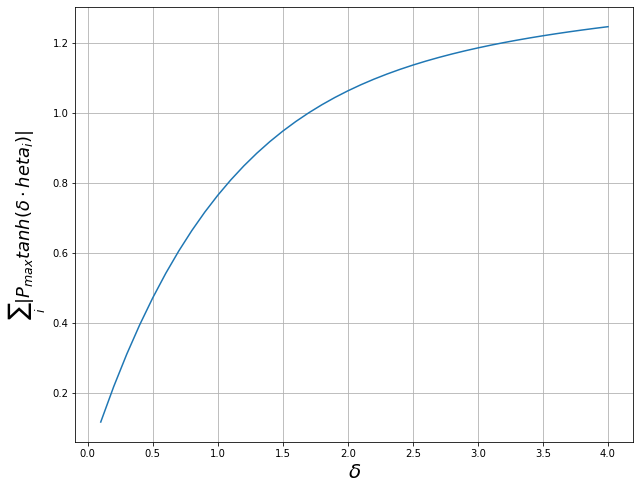

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(delta2, controls2_sum)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0)
ax.set_ylabel('$\sum_i | P_{max} tanh( \delta \cdot \theta_{i} )| $', fontsize=18, rotation=90)
plt.grid()
plt.show()

#### surface plot

In [66]:
delta3 = df.iloc[:,0]
Pmax3 = df.iloc[:,1]
controls3 = df.iloc[:, 2:9]
controls_abs3 = controls3.abs()
controls_sum3 = controls_abs3.sum(axis=1)

In [67]:
delta3 = np.matrix(delta3)
Pmax3 = np.matrix(Pmax3)
control_sum3 = np.matrix(controls_sum3)
print(delta3.shape)
x = np.reshape(delta3, (492))
print(x.shape)
x = np.reshape(delta3, (123, 4))
print(x.shape)

(1, 492)
(1, 492)
(123, 4)


In [71]:
print(len(delta3))
x = np.reshape(delta3, (4, 123))
y = np.reshape(Pmax3, (4, 123))
z = np.reshape(control_sum3, (4, 123))

1


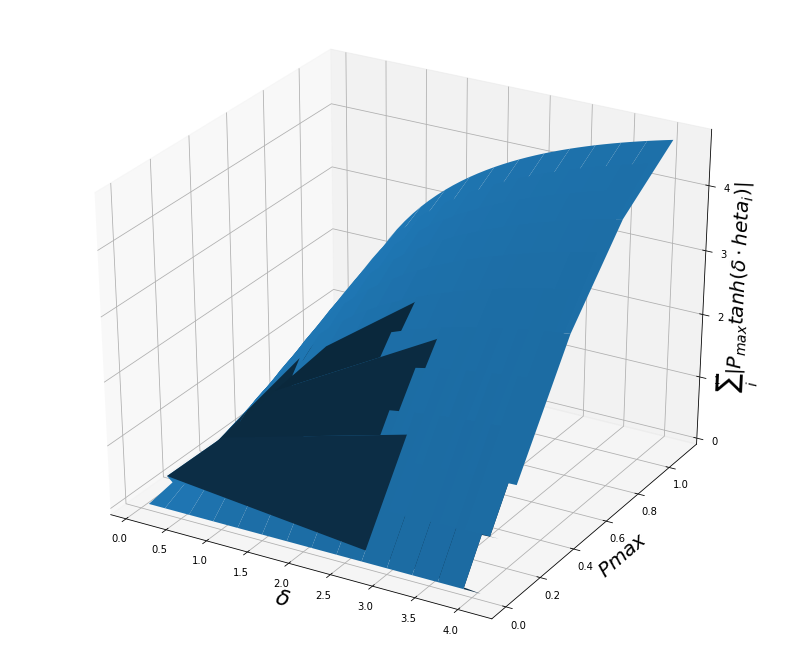

In [72]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)

ax.set_xlabel('$\delta$', fontsize=22, rotation=150)
ax.set_ylabel('$Pmax$', fontsize=20)
ax.set_zlabel('$\sum_i | P_{max} tanh( \delta \cdot \theta_{i} )| $', fontsize=20, rotation=60)
plt.show()

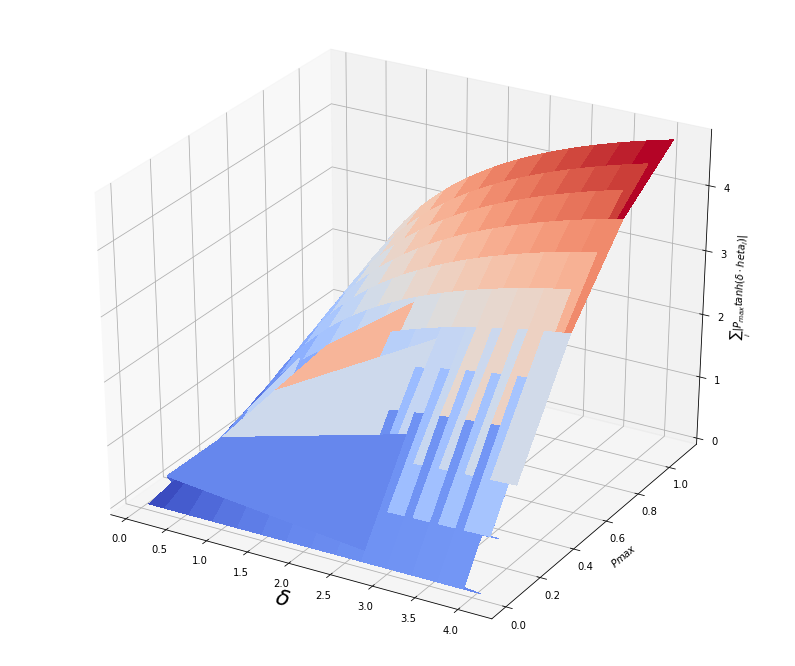

In [73]:
fig = plt.figure(figsize=(14,12))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$\delta$', fontsize=22, rotation=150)
ax.set_ylabel('$Pmax$', fontsize=10)
ax.set_zlabel('$\sum_i | P_{max} tanh( \delta \cdot \theta_{i} )| $', fontsize=10, rotation=60)
plt.show()